In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv("questions.csv")
df.shape

(404351, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

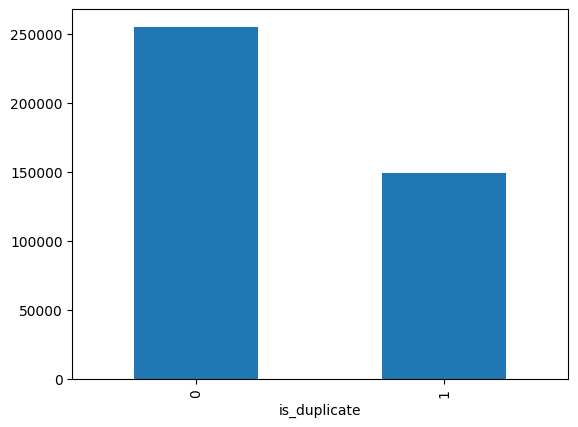

In [8]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


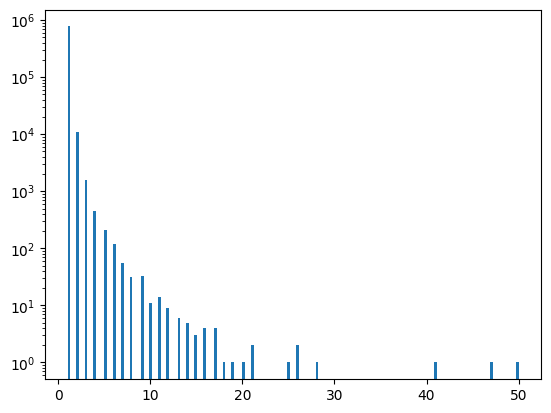

In [10]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [11]:
new_df = df.sample(30000)
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
27415,What was the reason behind the Bhopal gas trag...,Has the Bhopal gas tragedy been solved?
385485,I have a large freckle and I wish to remove or...,"Can freckles be removed, or completely prevent..."
55498,What if I take whey protein and don't workout?,Should I take whey protein before and after I ...
187971,What is the difference between to ride and to ...,"What is the difference between ""down for the r..."
106774,So what happens after I die and what happens t...,Where do we go when we die?


In [13]:
# Test example for np.vsplit
import numpy as np

# Create a simple 6x3 array
test_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15],
    [16, 17, 18]
])

print("Original array:")
print(test_array)
print("\nShape:", test_array.shape)

# Split array vertically into 2 equal parts
array1, array2 = np.vsplit(test_array, 2)

print("\nAfter vsplit into 2 parts:")
print("First array:")
print(array1)
print("\nSecond array:")
print(array2)
print("\nShapes:", array1.shape, array2.shape)

# This demonstrates how your questions array is split:
# - If you have 30000 questions, each transformed into 3000 features
# - Original array shape would be (60000, 3000)
# - After vsplit: q1_arr and q2_arr each have shape (30000, 3000)

Original array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]]

Shape: (6, 3)

After vsplit into 2 parts:
First array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Second array:
[[10 11 12]
 [13 14 15]
 [16 17 18]]

Shapes: (3, 3) (3, 3)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = (list(ques_df['question1'].fillna('')) + 
            list(ques_df['question2'].fillna('')))
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [15]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [16]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7451666666666666

In [21]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
x = accuracy_score(y_test,y_pred)

print(x)

0.7261666666666666


In [33]:
# ...existing code...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Replace the original dense-only model with regularization + dropout
model = Sequential()

model.add(Dense(600, input_dim=6000, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(300, input_dim=6000, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(120, input_dim=6000, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(60, input_dim=6000, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))

model.add(Dense(5, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# Callbacks to prevent overfitting and adapt learning rate
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Fit with callbacks (adjust batch_size/epochs as needed)
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=50,
                    callbacks=[es, rlp])
# ...existing code...

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5338 - loss: 0.8854 - val_accuracy: 0.6167 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6333 - loss: 0.8341 - val_accuracy: 0.6167 - val_loss: 0.8432 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6386 - loss: 0.8324 - val_accuracy: 0.6344 - val_loss: 0.8355 - learning_rate: 0.0010
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6666 - loss: 0.8296 - val_accuracy: 0.6812 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7101 - loss: 0.8113 - val_accuracy: 0.7069 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7538 - loss: 0.7667 - val_accuracy: 0.7133 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7804 - l

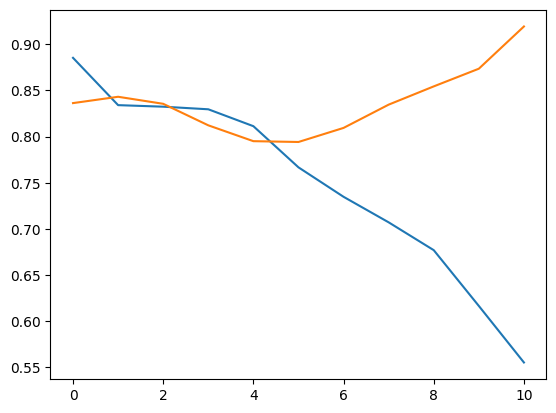

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

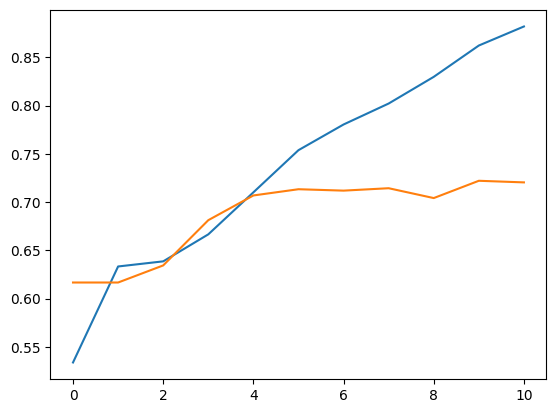

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [41]:
y_pred = model.predict(X_test)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [44]:
y_pred_cls = (y_pred > 0.5).astype('int32').reshape(-1)
y_pred_cls

array([0, 1, 0, ..., 1, 0, 0], shape=(6000,), dtype=int32)

In [46]:
print(accuracy_score(y_test,y_pred_cls))

0.7293333333333333


In [4]:
df = pd.read_csv("questions.csv")
df.shape

(404351, 6)

In [5]:
new_df = df.sample(30000,random_state=2)

In [6]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59795
Number of questions getting repeated 176


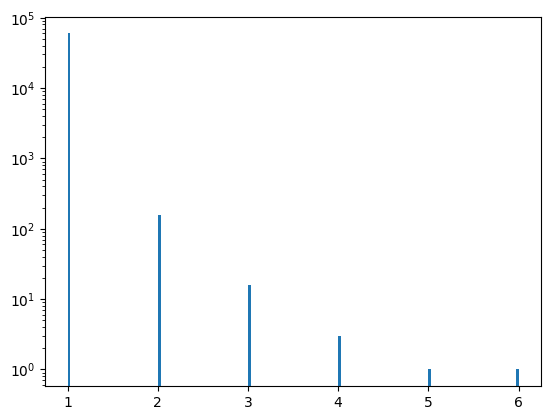

In [7]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [8]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [9]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [10]:

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [11]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [12]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


minimum characters 2
maximum characters 332
average num of characters 59


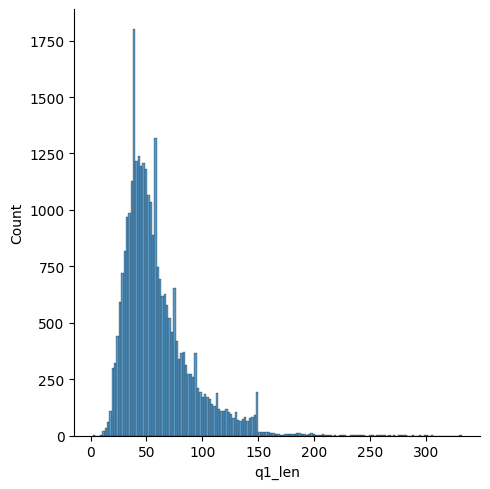

In [13]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 3
maximum characters 1151
average num of characters 59


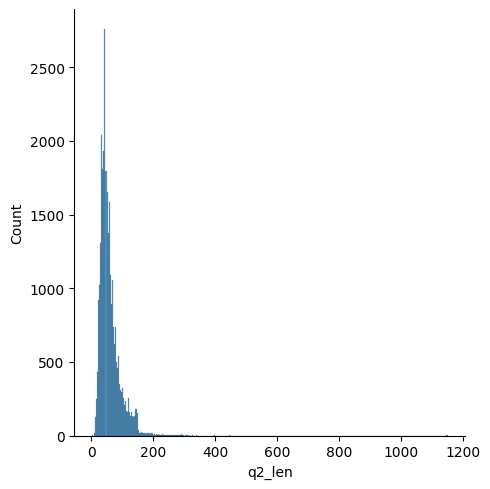

In [14]:

sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 63
average num of words 10


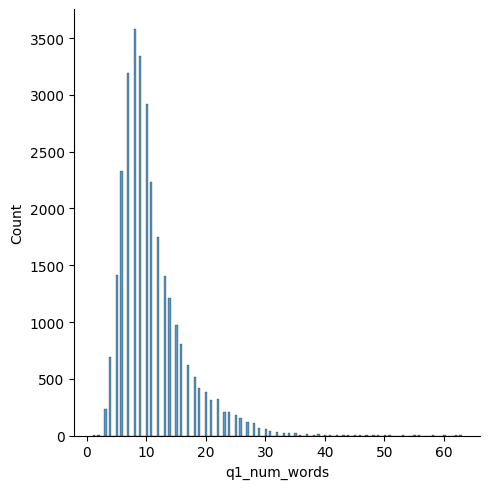

In [15]:

sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


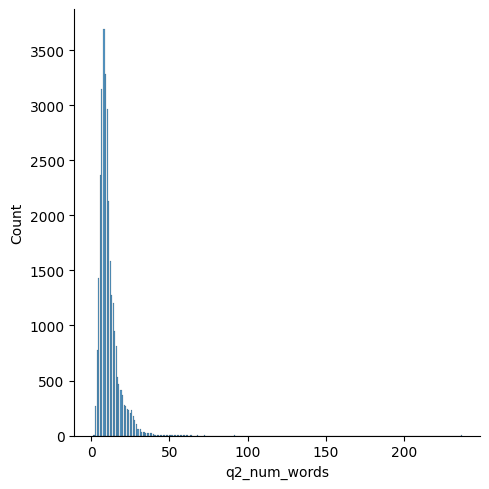

In [16]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

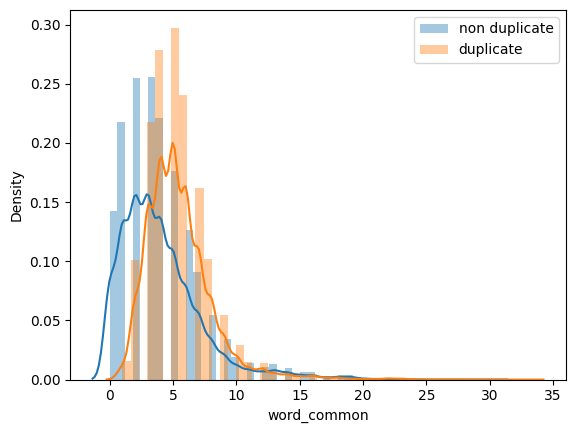

In [17]:

# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

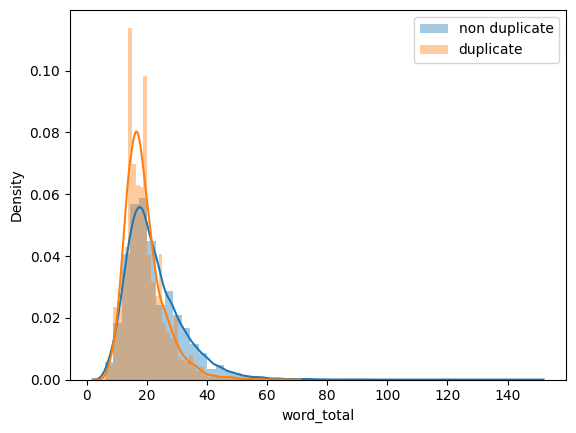

In [18]:

# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [19]:
ques_df = new_df[['question1','question2']]
ques_df.head()
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [20]:

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7646666666666667

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7676666666666667

In [70]:
# ...existing code...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Replace the original dense-only model with regularization + dropout
model = Sequential()

model.add(Dense(600, input_dim=6007, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(300, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(120,activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(60, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))

model.add(Dense(5, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# Callbacks to prevent overfitting and adapt learning rate
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Fit with callbacks (adjust batch_size/epochs as needed)
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=50,
                    callbacks=[es, rlp])
# ...existing code...

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6015 - loss: 0.7849 - val_accuracy: 0.6254 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6245 - loss: 0.7486 - val_accuracy: 0.6254 - val_loss: 0.7274 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6327 - loss: 0.7051 - val_accuracy: 0.6804 - val_loss: 0.6806 - learning_rate: 0.0010
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6538 - loss: 0.6718 - val_accuracy: 0.6708 - val_loss: 0.7500 - learning_rate: 0.0010
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6650 - loss: 0.6548 - val_accuracy: 0.6975 - val_loss: 0.6125 - learning_rate: 0.0010
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6835 - loss: 0.6331 - val_accuracy: 0.7098 - val_loss: 0.6163 - learning_rate: 0.0010
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6924 - l

In [71]:
y_pred = model.predict(X_test)
y_pred_cls = (y_pred > 0.5).astype('int32').reshape(-1)
y_pred_cls
print(accuracy_score(y_test,y_pred_cls))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.7521666666666667


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Enhanced model with embedding
model = Sequential([
    # Embedding layer
    Embedding(input_dim=6007, output_dim=300, input_length=6007),
    Flatten(),
    
    # First dense block
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Second dense block with residual-like structure
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Third dense block
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Fourth dense block
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile with optimized settings
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Enhanced callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train with modified parameters
history = model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    batch_size=64,  # Increased batch size
    epochs=100,     # More epochs with early stopping
    callbacks=callbacks,
    verbose=1
)

# Add evaluation plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()